In [1]:
%%configure -f
{ "conf":{
"spark.pyspark.virtualenv.enabled": "false"
}}

In [2]:
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import from_unixtime
from pyspark.sql.window import Window
from pyspark.sql import functions as F

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1586103322681_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
%local
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_ontario = spark.sql("""select from_unixtime(unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd')) as date, 
province_state, sum(confirmed) as numConfirmed 
from covid19.jhu_daily_new
where year='2020' and int(month) > 2
and country_region = 'Canada' and 
( province_state = 'Ontario' ) 
group by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd'), province_state
order by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd') asc, sum(confirmed) desc""")
df_ontario.show()

my_window = Window.partitionBy().orderBy("date")

df_ontario = df_ontario.withColumn("dayBefore", F.lag(df_ontario.numConfirmed).over(my_window))
df_ontario = df_ontario.withColumn("change", F.when(F.isnull(df_ontario.numConfirmed - df_ontario.dayBefore), 0).otherwise(df_ontario.numConfirmed - df_ontario.dayBefore))

df_ontario.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------------+------------+
|               date|province_state|numConfirmed|
+-------------------+--------------+------------+
|2020-03-22 00:00:00|       Ontario|         425|
|2020-03-23 00:00:00|       Ontario|         503|
|2020-03-24 00:00:00|       Ontario|         588|
|2020-03-25 00:00:00|       Ontario|         688|
|2020-03-26 00:00:00|       Ontario|         858|
|2020-03-27 00:00:00|       Ontario|         994|
|2020-03-28 00:00:00|       Ontario|        1144|
|2020-03-29 00:00:00|       Ontario|        1355|
|2020-03-30 00:00:00|       Ontario|        1706|
|2020-03-31 00:00:00|       Ontario|        1966|
|2020-04-01 00:00:00|       Ontario|        2392|
|2020-04-02 00:00:00|       Ontario|        2793|
|2020-04-03 00:00:00|       Ontario|        3255|
|2020-04-04 00:00:00|       Ontario|        3630|
+-------------------+--------------+------------+

+-------------------+--------------+------------+---------+------+
|               date|province_st

In [5]:
df_bc = spark.sql("""select from_unixtime(unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd')) as date, 
province_state, sum(confirmed) as numConfirmed 
from covid19.jhu_daily_new
where year='2020' and int(month) > 2
and country_region = 'Canada' and 
( province_state = 'British Columbia' ) 
group by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd'), province_state
order by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd') asc, sum(confirmed) desc""")
df_bc.show()

my_window = Window.partitionBy().orderBy("date")

df_bc = df_bc.withColumn("dayBefore", F.lag(df_bc.numConfirmed).over(my_window))
df_bc = df_bc.withColumn("change", F.when(F.isnull(df_bc.numConfirmed - df_bc.dayBefore), 0).otherwise(df_bc.numConfirmed - df_bc.dayBefore))

df_bc.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----------------+------------+
|               date|  province_state|numConfirmed|
+-------------------+----------------+------------+
|2020-03-22 00:00:00|British Columbia|         424|
|2020-03-23 00:00:00|British Columbia|         472|
|2020-03-24 00:00:00|British Columbia|         617|
|2020-03-25 00:00:00|British Columbia|         617|
|2020-03-26 00:00:00|British Columbia|         725|
|2020-03-27 00:00:00|British Columbia|         725|
|2020-03-28 00:00:00|British Columbia|         884|
|2020-03-29 00:00:00|British Columbia|         884|
|2020-03-30 00:00:00|British Columbia|         970|
|2020-03-31 00:00:00|British Columbia|        1013|
|2020-04-01 00:00:00|British Columbia|        1013|
|2020-04-02 00:00:00|British Columbia|        1121|
|2020-04-03 00:00:00|British Columbia|        1174|
|2020-04-04 00:00:00|British Columbia|        1203|
+-------------------+----------------+------------+

+-------------------+----------------+------------+---------+--

In [6]:
df_quebec = spark.sql("""select from_unixtime(unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd')) as date, 
province_state, sum(confirmed) as numConfirmed 
from covid19.jhu_daily_new
where year='2020' and int(month) > 2
and country_region = 'Canada' and 
( province_state = 'Quebec' ) 
group by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd'), province_state
order by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd') asc, sum(confirmed) desc""")
df_quebec.show()

my_window = Window.partitionBy().orderBy("date")

df_quebec = df_quebec.withColumn("dayBefore", F.lag(df_quebec.numConfirmed).over(my_window))
df_quebec = df_quebec.withColumn("change", F.when(F.isnull(df_quebec.numConfirmed - df_quebec.dayBefore), 0).otherwise(df_quebec.numConfirmed - df_quebec.dayBefore))

df_quebec.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------------+------------+
|               date|province_state|numConfirmed|
+-------------------+--------------+------------+
|2020-03-22 00:00:00|        Quebec|         219|
|2020-03-23 00:00:00|        Quebec|         628|
|2020-03-24 00:00:00|        Quebec|        1013|
|2020-03-25 00:00:00|        Quebec|        1342|
|2020-03-26 00:00:00|        Quebec|        1632|
|2020-03-27 00:00:00|        Quebec|        2024|
|2020-03-28 00:00:00|        Quebec|        2498|
|2020-03-29 00:00:00|        Quebec|        2840|
|2020-03-30 00:00:00|        Quebec|        3430|
|2020-03-31 00:00:00|        Quebec|        4162|
|2020-04-01 00:00:00|        Quebec|        4611|
|2020-04-02 00:00:00|        Quebec|        5518|
|2020-04-03 00:00:00|        Quebec|        6101|
|2020-04-04 00:00:00|        Quebec|        6101|
+-------------------+--------------+------------+

+-------------------+--------------+------------+---------+------+
|               date|province_st

In [7]:
df_alberta = spark.sql("""select from_unixtime(unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd')) as date, 
province_state, sum(confirmed) as numConfirmed 
from covid19.jhu_daily_new
where year='2020' and int(month) > 2
and country_region = 'Canada' and 
( province_state = 'Alberta' ) 
group by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd'), province_state
order by unix_timestamp(concat(year,'-',month,'-',day),'yyyy-MM-dd') asc, sum(confirmed) desc""")
df_alberta.show()

my_window = Window.partitionBy().orderBy("date")

df_alberta = df_alberta.withColumn("dayBefore", F.lag(df_alberta.numConfirmed).over(my_window))
df_alberta = df_alberta.withColumn("change", F.when(F.isnull(df_alberta.numConfirmed - df_alberta.dayBefore), 0).otherwise(df_alberta.numConfirmed - df_alberta.dayBefore))

df_alberta.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------------+------------+
|               date|province_state|numConfirmed|
+-------------------+--------------+------------+
|2020-03-22 00:00:00|       Alberta|         259|
|2020-03-23 00:00:00|       Alberta|         301|
|2020-03-24 00:00:00|       Alberta|         359|
|2020-03-25 00:00:00|       Alberta|         358|
|2020-03-26 00:00:00|       Alberta|         486|
|2020-03-27 00:00:00|       Alberta|         542|
|2020-03-28 00:00:00|       Alberta|         542|
|2020-03-29 00:00:00|       Alberta|         621|
|2020-03-30 00:00:00|       Alberta|         661|
|2020-03-31 00:00:00|       Alberta|         690|
|2020-04-01 00:00:00|       Alberta|         754|
|2020-04-02 00:00:00|       Alberta|         969|
|2020-04-03 00:00:00|       Alberta|         969|
|2020-04-04 00:00:00|       Alberta|        1075|
+-------------------+--------------+------------+

+-------------------+--------------+------------+---------+------+
|               date|province_st

In [8]:
%spark -o df_ontario

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
%spark -o df_bc

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
%spark -o df_quebec

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
%spark -o df_alberta

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

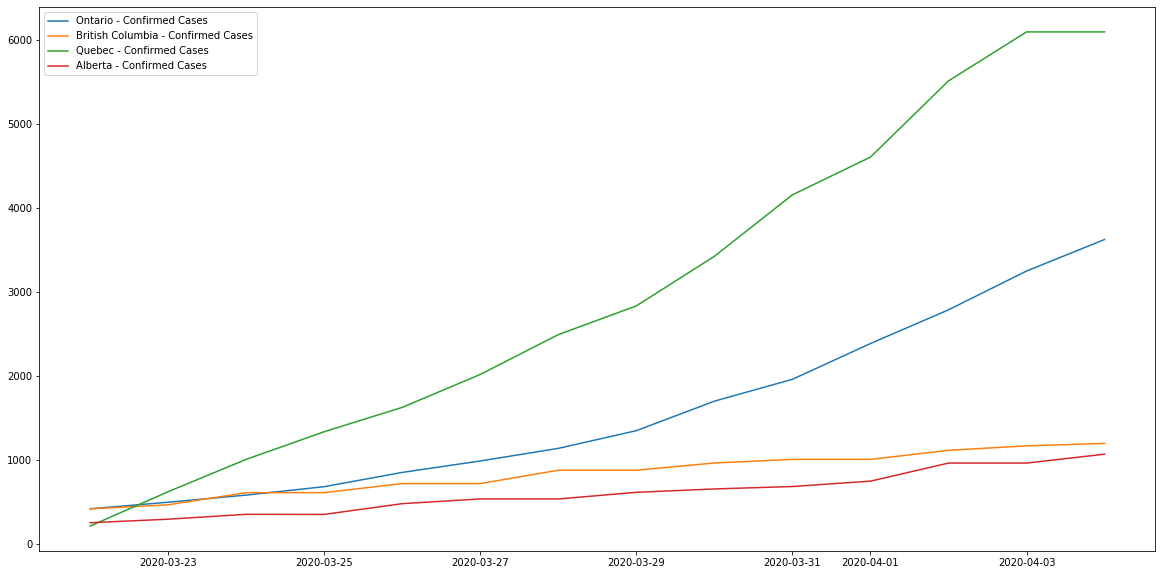

In [12]:
%local
plt.figure(figsize=(20,10))
plt.plot('date', 'numConfirmed', data=df_ontario, label="Ontario - Confirmed Cases")
plt.plot('date', 'numConfirmed', data=df_bc, label="British Columbia - Confirmed Cases")
plt.plot('date', 'numConfirmed', data=df_quebec, label="Quebec - Confirmed Cases")
plt.plot('date', 'numConfirmed', data=df_alberta, label="Alberta - Confirmed Cases")
plt.text
plt.legend()
plt.show()

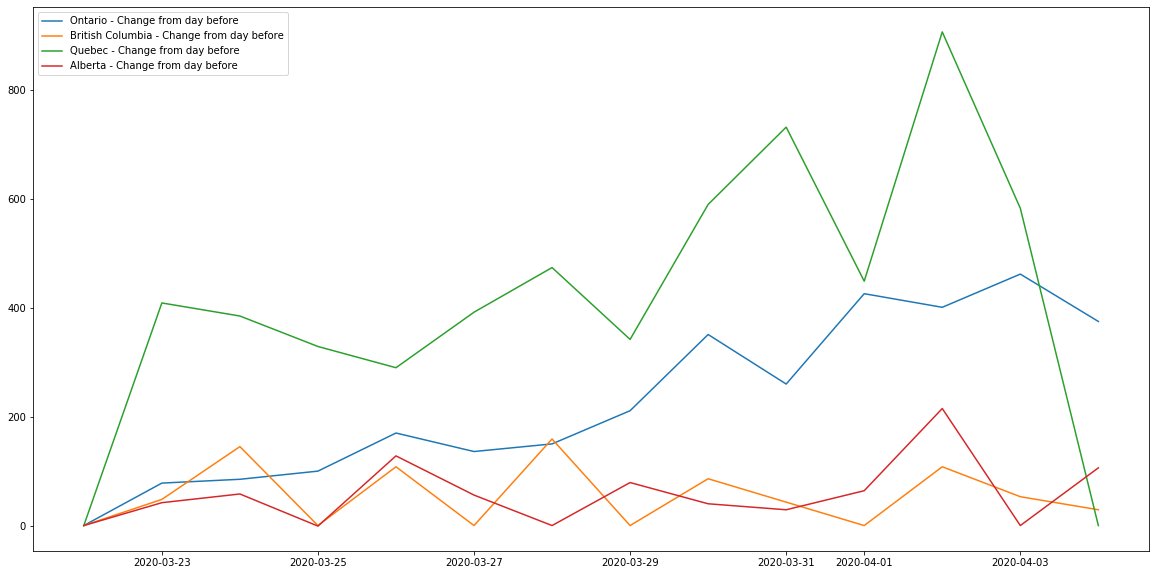

In [13]:
%local
plt.figure(figsize=(20,10))
plt.plot('date', 'change', data=df_ontario, label="Ontario - Change from day before")
plt.plot('date', 'change', data=df_bc, label="British Columbia - Change from day before")
plt.plot('date', 'change', data=df_quebec, label="Quebec - Change from day before")
plt.plot('date', 'change', data=df_alberta, label="Alberta - Change from day before")
plt.text
plt.legend()
plt.show()

In [29]:
df_canada = df_ontario.union(df_bc).union(df_quebec).union(df_alberta)

movAvgSpec = Window.partitionBy("province_state").orderBy("date").rowsBetween(-3,0)

df_canada_movAvg = df_canada.withColumn( "movingAverage", F.avg("change").over(movAvgSpec) )
df_canada_movAvg.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------------+------------+---------+------+------------------+
|               date|province_state|numConfirmed|dayBefore|change|     movingAverage|
+-------------------+--------------+------------+---------+------+------------------+
|2020-03-22 00:00:00|       Alberta|         259|     null|     0|               0.0|
|2020-03-23 00:00:00|       Alberta|         301|      259|    42|              21.0|
|2020-03-24 00:00:00|       Alberta|         359|      301|    58|33.333333333333336|
|2020-03-25 00:00:00|       Alberta|         358|      359|    -1|             24.75|
|2020-03-26 00:00:00|       Alberta|         486|      358|   128|             56.75|
|2020-03-27 00:00:00|       Alberta|         542|      486|    56|             60.25|
|2020-03-28 00:00:00|       Alberta|         542|      542|     0|             45.75|
|2020-03-29 00:00:00|       Alberta|         621|      542|    79|             65.75|
|2020-03-30 00:00:00|       Alberta|         661|     

In [30]:
%spark -o df_canada_movAvg

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
df_provinces = spark.sql("""select province_state 
from covid19.jhu_daily_new 
where province_state = 'Ontario' or province_state = 'Alberta' or 
province_state = 'Quebec' or province_state = 'British Columbia' 
group by province_state
""")
df_provinces.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+
|  province_state|
+----------------+
|         Alberta|
|         Ontario|
|British Columbia|
|          Quebec|
+----------------+

In [32]:
%spark -o df_provinces

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

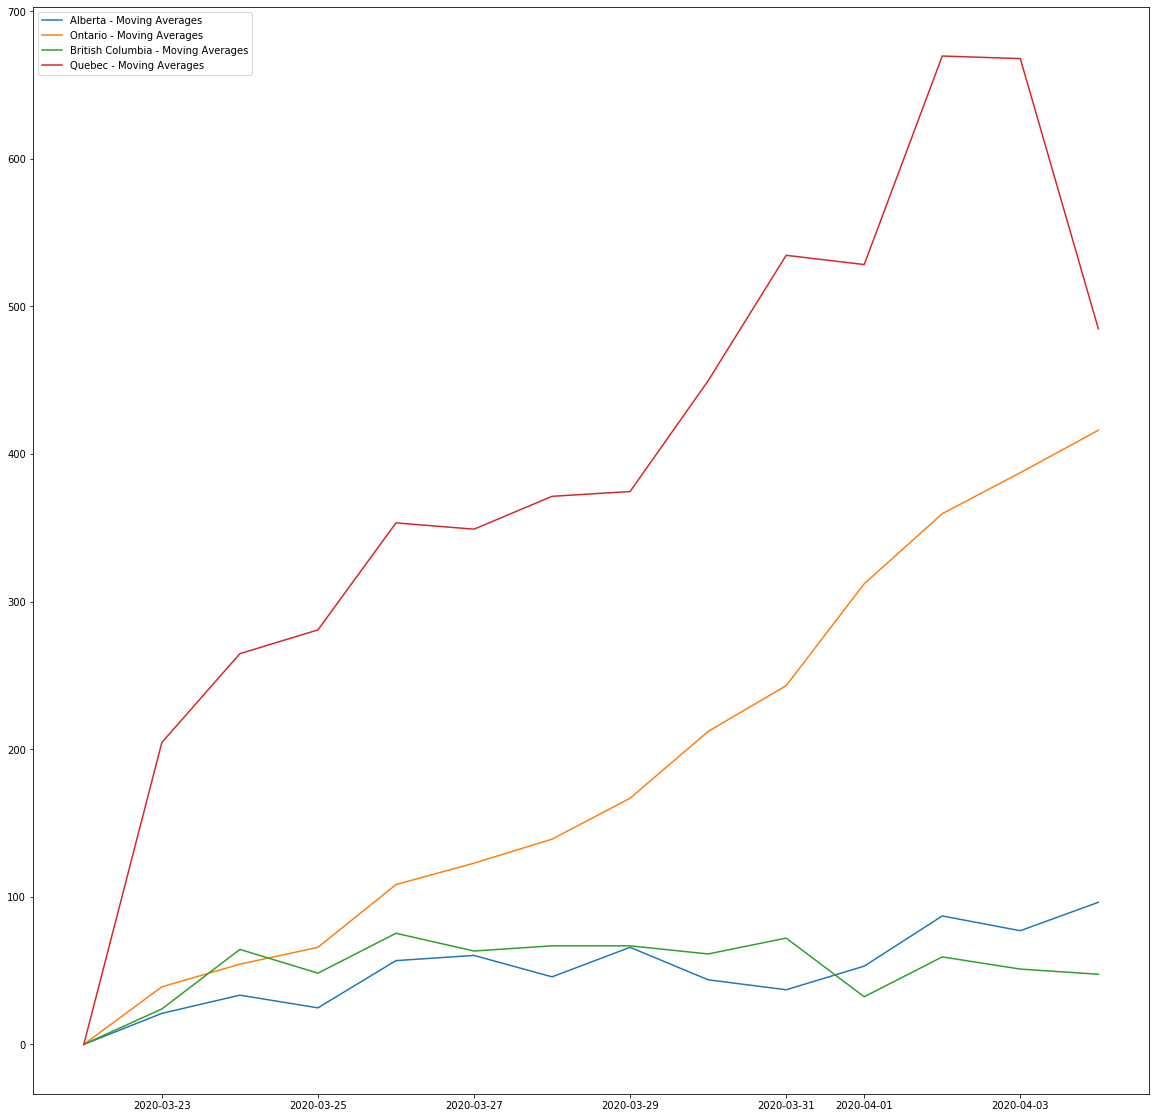

In [33]:
%local
plt.figure(figsize=(20,20))
for index in df_provinces.index:
  plt.plot('date', 'movingAverage', data=df_canada_movAvg.loc[df_canada_movAvg['province_state']==df_provinces['province_state'][index]],label=df_provinces['province_state'][index] + ' - Moving Averages')
  plt.text
plt.legend()
plt.show()